# import and read data from file

In [27]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
# define training and test data directories

train_dir = 'abuse - Copy'
test_dir = 'abuse_test - Copy'
abb = 'abb'

# classes are folders in each directory with these names
classes = ['natural', 'abuse']


# transformation (convert to torch)

In [29]:
# load and transform data using ImageFolder
# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.CenterCrop(224), 
                                      transforms.ToTensor()])

#Image folder be3ml trasform w erg3ha png
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)
abb_data = datasets.ImageFolder(abb, transform=data_transform)


# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))
print('Num test images: ', len(abb_data))

type(train_data)

Num training images:  862
Num test images:  166
Num test images:  20


torchvision.datasets.folder.ImageFolder

# dataloader

In [31]:
batch_size=20
num_workers=0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
abb_loader = torch.utils.data.DataLoader(abb_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
type(train_loader)

torch.utils.data.dataloader.DataLoader

# Visualize some sample data

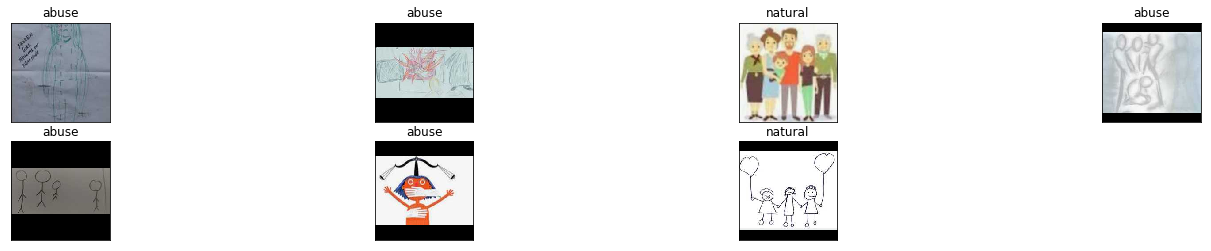

In [14]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(7):
    ax = fig.add_subplot(2, 8/2, idx+1, xticks=[], yticks=[])
    #(1,2,0) da bta3 3 D image
    plt.imshow( np.transpose(images[idx], (1, 2, 0)) )
    ax.set_title(classes[labels[idx]])

# Load the pretrained model

In [32]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)

# print out the model structure
#print(vgg16)

In [33]:
# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False

# last layer

In [34]:
import torch.nn as nn

num_inputs = vgg16.classifier[6].in_features
classfier_layer = nn.Linear(num_inputs, len(classes))

vgg16.classifier[6] = classfier_layer

# loss

In [35]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

# train

In [36]:
import numpy as np

In [37]:
from sklearn.model_selection import KFold

In [38]:
kf = KFold(n_splits=2)

In [40]:
for train, test in kf.split(train_loader):
...     print("%s %s" % (train, test))

TypeError: Singleton array array(<torch.utils.data.dataloader.DataLoader object at 0x000001C6F39B10B8>,
      dtype=object) cannot be considered a valid collection.